# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 01:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по одному объекту, выбранному случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь для каждой итерации, начиная с нулевой (до первого шага).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [4]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0
s0 = 1
p = 0.5

In [4]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [5]:
X1 = np.arange(9).reshape(3, 3)
y1 = np.arange(3)
w1 = np.zeros(3)

In [6]:
Xtrain1 = np.c_[np.ones(X1.shape[0]), X1]
Xtrain1

array([[1., 0., 1., 2.],
       [1., 3., 4., 5.],
       [1., 6., 7., 8.]])

In [7]:
descent1 = GradientDescent(lambda_ = lambda_, w0 = w1)
gradient = descent1.calc_gradient(X1, y1)
gradient

array([-10., -12., -14.])

In [688]:
diff1 = descent1.step(X1, y1, 0)
diff1

array([-0.1 , -0.12, -0.14])

In [689]:
descent1.w # первая итерация вектора весов

array([0.1 , 0.12, 0.14])

In [690]:
gradient = descent1.calc_gradient(X1, y1)
gradient

array([3.2 , 4.16, 5.12])

In [691]:
diff2 = descent1.step(X1, y1, 1)
diff2

array([0.02262742, 0.02941564, 0.03620387])

In [225]:
descent1.w # руками все ок  -> это вторая итерация вектора весов 

array([0.07737258, 0.09058436, 0.10379613])

In [226]:
gradient = descent1.calc_gradient(X1, y1)
gradient

array([-0.05834805,  0.16852364,  0.39539533])

In [227]:
diff2 = descent1.step(X1, y1, 2)
diff2

array([-0.00033687,  0.00097297,  0.00228282])

In [228]:
descent1.w

array([0.07770946, 0.08961139, 0.10151332])

In [8]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [9]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [10]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [16]:
X1.shape


(3, 3)

In [753]:
y1.shape

(3,)

In [15]:
w0.shape

(4,)

In [17]:
w0 = np.zeros(X1.shape[1])

In [18]:
# проверка для себя обычного градиента
regression1 = LinearRegression(
    descent = GradientDescent(lambda_ = lambda_, w0 = w0),
    tolerance = tolerance,
    max_iter = max_iter
)

In [19]:
regression1.fit(X1, y1)

<bound method LinearRegression.fit of <utils.LinearRegression object at 0x112e08240>>

In [20]:
regression1.loss_history

[1.6666666666666667,
 0.2346666666666667,
 0.03562046110077873,
 0.03478969911255076,
 0.03440135043711029,
 0.034071959410802315,
 0.03377544685535081,
 0.033503469538528265,
 0.033251109816638924,
 0.033014957392039405]

In [21]:
prediction = regression1.predict(X1)
prediction

array([0.28317478, 1.09252411, 1.90187344])

In [145]:
#работает - все ок
descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X1, y1)

assert gradient.shape[0] == 3, 'Gradient failed'

In [587]:
print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [591]:
w0 = np.zeros(X.shape[1]+1)

In [592]:
regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance_default,
    max_iter = max_iter_default
)



In [593]:
regression.fit(X, y)

<bound method LinearRegression.fit of <utils.LinearRegression object at 0x1a30ff3a90>>

In [594]:
regression.loss_history

[49.38297153934959]

In [595]:
prediction = regression.predict(X)
prediction

array([0.01612389, 0.014785  , 0.01719169, 0.01428049, 0.0151781 ,
       0.01351244, 0.01470354, 0.01584209, 0.01775113, 0.01944896,
       0.01512168, 0.01607314, 0.01406541, 0.01574469, 0.01506123,
       0.01171698, 0.01296841, 0.01568715, 0.01362314, 0.0155378 ,
       0.01464059, 0.01501195, 0.01413333, 0.01674306, 0.01877035,
       0.0158075 , 0.01397463, 0.01613204, 0.02129376, 0.01551132,
       0.01347004, 0.01202048, 0.0187111 , 0.01553378, 0.0178285 ,
       0.01371419, 0.01323104, 0.01562156, 0.01006454, 0.01383483,
       0.01302971, 0.01077281, 0.01906876, 0.0121102 , 0.0154493 ,
       0.01564663, 0.01908661, 0.01211963, 0.01414476, 0.0147624 ,
       0.01325786, 0.01656723, 0.010165  , 0.01645909, 0.01340088,
       0.01788021, 0.01421523, 0.01469259, 0.01472604, 0.01645703,
       0.01742998, 0.01196703, 0.01549   , 0.01366694, 0.01809894,
       0.01404795, 0.01492631, 0.01463935, 0.0168644 , 0.01602918,
       0.01338945, 0.01943047, 0.01466043, 0.01784389, 0.01605

In [6]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

In [8]:
regression.loss_history

[0.32932955069272923,
 0.3201630527854655,
 0.30635535539171915,
 0.2983061432522042,
 0.2930835074671902,
 0.2882487383628796,
 0.28249029156831734,
 0.2777663631977084,
 0.273757258168791,
 0.26999459598078596]

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**: 
* **StochasticDescent**:
* **MomentumDescent**:
* **Adagrad**:
* **LinearRegression**:

36634610 - GD
36669434 - SD
36681277 - MD
36705965 - adagrad
36935987 - LInreg
Логин - pr.leha

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [1]:
# YOUR CODE:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('autos.csv')
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000


In [5]:
price = data['price']
#data = data.drop(['price'], axis = 1)
data.shape

(247872, 14)

In [6]:
data.sample(10)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
50140,audi,a6,kombi,manuell,diesel,nein,177,125000,2012,2,2016-03-10 00:00:00,2016-04-06 01:17:13,48157,24599
231040,seat,ibiza,kleinwagen,manuell,benzin,nein,75,90000,2004,8,2016-03-28 00:00:00,2016-04-02 22:48:16,95163,2100
178072,audi,a6,kombi,automatik,diesel,nein,150,150000,1999,3,2016-04-04 00:00:00,2016-04-06 09:16:43,68723,1211
186352,seat,altea,limousine,manuell,diesel,nein,105,150000,2004,7,2016-03-18 00:00:00,2016-03-25 02:15:34,58642,4200
137599,mazda,andere,suv,manuell,diesel,nein,109,150000,2002,10,2016-03-09 00:00:00,2016-03-10 15:18:19,26316,3500
152854,toyota,yaris,kleinwagen,manuell,benzin,nein,101,80000,2010,12,2016-03-30 00:00:00,2016-04-04 23:46:09,10551,5499
197078,mercedes_benz,c_klasse,kombi,automatik,diesel,nein,170,150000,2012,9,2016-03-05 00:00:00,2016-03-22 04:46:10,13509,15300
217679,volkswagen,golf,cabrio,manuell,benzin,nein,90,150000,1995,3,2016-03-12 00:00:00,2016-03-20 03:48:12,55239,1250
219237,volkswagen,caddy,bus,manuell,cng,nein,109,100000,2010,9,2016-03-25 00:00:00,2016-04-06 18:15:45,56281,9500
153470,mazda,6_reihe,limousine,manuell,benzin,nein,120,125000,2008,7,2016-03-28 00:00:00,2016-04-06 22:17:47,52525,8500


In [15]:
data[data['powerPS'] >= 600]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
2845,mitsubishi,colt,limousine,manuell,diesel,nein,953,150000,2005,4,2016-04-03 00:00:00,2016-04-07 14:56:46,60326,3100
4373,chevrolet,matiz,kleinwagen,manuell,benzin,ja,603,5000,2002,11,2016-03-31 00:00:00,2016-04-01 03:41:52,44379,599
4605,opel,corsa,kleinwagen,manuell,benzin,ja,603,150000,1996,8,2016-03-31 00:00:00,2016-04-06 14:17:51,70327,600
8884,ford,ka,cabrio,manuell,benzin,nein,952,70000,2003,5,2016-03-09 00:00:00,2016-03-12 04:16:07,26903,3500
19893,mercedes_benz,s_klasse,limousine,automatik,benzin,nein,751,60000,2009,10,2016-04-01 00:00:00,2016-04-07 10:44:22,86159,89000
30450,citroen,c4,limousine,manuell,diesel,nein,900,100000,2005,2,2016-03-29 00:00:00,2016-04-04 05:16:35,46459,2850
35211,nissan,andere,coupe,manuell,benzin,nein,600,20000,2000,2,2016-03-12 00:00:00,2016-03-16 06:45:56,72285,49999
38298,mercedes_benz,e_klasse,limousine,automatik,benzin,nein,632,100000,2004,10,2016-03-20 00:00:00,2016-03-22 15:17:12,21129,22500
43371,mercedes_benz,sl,cabrio,automatik,benzin,nein,721,100000,2006,7,2016-03-15 00:00:00,2016-03-17 04:15:23,49635,99900
44233,mercedes_benz,andere,coupe,automatik,benzin,nein,650,60000,2011,2,2016-03-29 00:00:00,2016-04-05 13:15:52,63225,68500


In [6]:
data['notRepairedDamage'] = (data['notRepairedDamage'] == 'ja')*1

In [7]:
data['gearbox'] = (data['gearbox'] == 'automatik')*1

In [9]:
data.notRepairedDamage.value_counts()

0    223265
1     24607
Name: notRepairedDamage, dtype: int64

In [13]:
len(data.yearOfRegistration.unique())

85

In [14]:
data.fuelType.value_counts()

benzin     159581
diesel      83841
lpg          3718
cng           429
hybrid        198
andere         53
elektro        52
Name: fuelType, dtype: int64

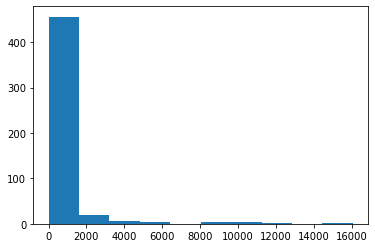

In [26]:
plt.hist(data['powerPS'].value_counts())
plt.show()

In [16]:
print('We do not need to worry about missing values.') if data.count().min() == data.shape[0] else print('oops')

We do not need to worry about missing values.


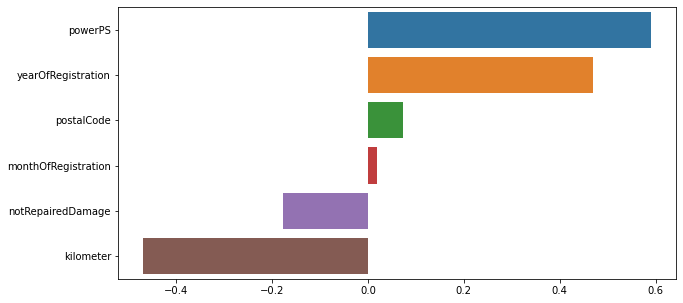

In [8]:
num_features = ['fuelType', 'powerPS', 'yearOfRegistration', 'postalCode', 'monthOfRegistration', 'kilometer', 'notRepairedDamage']
correlations = data[num_features].corrwith(price).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(10, 5)

In [24]:
data[data['kilometer'] >= data['kilometer'].quantile(0.999)]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,0,benzin,0,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
2,bmw,3er,limousine,0,benzin,1,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,0,benzin,0,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,0,benzin,0,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000
5,volkswagen,passat,kombi,0,diesel,1,140,150000,2005,12,2016-04-07 00:00:00,2016-04-07 10:25:17,57290,2799
7,renault,twingo,kleinwagen,1,benzin,0,75,150000,2004,2,2016-03-20 00:00:00,2016-04-06 13:16:07,65599,1750
8,ford,c_max,bus,0,diesel,0,136,150000,2007,6,2016-03-23 00:00:00,2016-04-05 18:45:11,88361,7550
9,mercedes_benz,a_klasse,bus,0,benzin,0,102,150000,2004,1,2016-04-01 00:00:00,2016-04-05 22:46:05,49565,1850
11,bmw,5er,limousine,1,benzin,0,231,150000,2002,7,2016-03-27 00:00:00,2016-04-07 06:44:26,68309,3699
12,seat,arosa,kleinwagen,0,benzin,0,50,150000,1997,5,2016-03-12 00:00:00,2016-03-21 01:46:11,9526,450


In [9]:
price = np.log1p(data['price'])

In [10]:
data = data.drop(['dateCreated', 'lastSeen', 'postalCode'], axis = 1)

In [20]:
#data[data['monthOfRegistration'] == 0].count() # решить что делать с нулями -> выкинуть нафиг
data['model'].value_counts()

golf                  20126
andere                18931
3er                   14997
polo                   8266
corsa                  7673
a4                     7607
passat                 7241
astra                  7189
5er                    6606
c_klasse               6599
e_klasse               5655
a3                     4833
a6                     4586
focus                  4235
transporter            3908
fiesta                 3733
2_reihe                3694
1er                    3316
a_klasse               2942
twingo                 2784
fortwo                 2766
vectra                 2572
touran                 2531
3_reihe                2514
mondeo                 2417
clio                   2215
zafira                 2067
x_reihe                1967
punto                  1949
megane                 1917
                      ...  
range_rover_evoque       64
gl                       54
crossfire                54
90                       53
v60                 

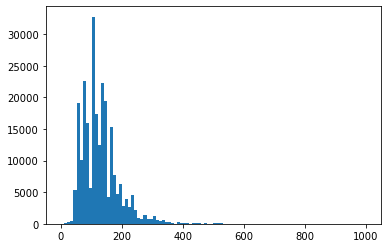

In [30]:
plt.hist(data.powerPS, bins=100)
plt.show() 

In [11]:
y = np.log1p(data['price'])

In [12]:
data['price'] = np.log1p(data['price'])

In [13]:
data.insert(0, 'ones', 1)

In [14]:
data.head(1)

,ones,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,price
0,1,volkswagen,golf,kleinwagen,0,benzin,0,75,150000,2001,6,7.313887


In [15]:
df_2 = data.copy()

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
numeric = ['gearbox', 'notRepairedDamage','powerPS', 'kilometer' ]
categorical = ['brand', 'model','vehicleType', 'fuelType', 'yearOfRegistration', 'monthOfRegistration' ]

In [17]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(data[numeric])
#column_transformer.fit(X_train2, y_train)

In [18]:
df2_scaled

array([[-0.55455826, -0.33198542, -0.87505988,  0.65904506],
       [-0.55455826, -0.33198542, -0.97176906, -0.84643896],
       [-0.55455826,  3.01218047, -0.43986858,  0.65904506],
       ...,
       [ 1.80323704, -0.33198542, -0.45598678,  0.03176005],
       [-0.55455826, -0.33198542, -0.43986858,  0.65904506],
       [-0.55455826, -0.33198542,  3.07389824, -1.85009497]])

In [19]:
enc = OneHotEncoder(handle_unknown='ignore')

In [20]:
df2_categorical = enc.fit_transform(data[categorical])

In [21]:
df2_categorical

<247872x402 sparse matrix of type '<class 'numpy.float64'>'
	with 1487232 stored elements in Compressed Sparse Row format>

In [22]:
from scipy.sparse import hstack # concatenate sparse матриces
df2_full = hstack([df2_scaled, df2_categorical]).toarray()

In [25]:
w0 = np.zeros(df2_full.shape[1])
w0.shape

(407,)

In [24]:
df2_full = np.insert(df2_full, 0,data['ones'] , axis=1)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(df2_full, y, test_size=0.4, random_state=10)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

In [27]:
print(X_train.shape)
print(y_train.shape)

(148723, 407)
(148723,)


In [32]:
tolerance_default: float = 1e-3
max_iter_default: int = 50


reg = LinearRegression(descent = GradientDescent(lambda_ = lambda_, w0 = w0),
    tolerance = tolerance_default,
    max_iter = max_iter_default)

In [33]:
reg.fit(X_train, y_train)

<bound method LinearRegression.fit of LinearRegression(descent=<utils.GradientDescent object at 0x1a23d27208>,
                 max_iter=50, tolerance=0.001)>

In [34]:
#reg.calc_loss(X_val, y_val)
print( reg.loss_history, len(reg.loss_history), "\n")

[69.1823932358185, 63.9206070145952, 60.46955737105837, 57.8009851057703, 55.59132631926768, 53.69067396633112, 52.01541014618932, 50.51339171883735, 49.14957224166229, 47.899088795298844, 46.74356732020413, 45.66898733368254, 44.66437097867784, 43.72093843406754, 42.831541933905065, 41.99027384654193, 41.19218764679739, 40.43309447737279, 39.709411728290625, 39.01804827737273, 38.35631611551231, 37.72186131655185, 37.11260942674583, 36.52672176351708, 35.962560079171965, 35.418657717156655, 34.89369586375181] 27 



Итого по предобработке- выбросов сильных нет. Их не удалял. Заменил Ja, Nein на соответствующие числоыве признаки. Удалил незначимые столбцы. Сделал ван-хот кодирование всех категориальных. Добавил bias.

Итерации ячеек непоследовательно так как на SAG kernel умер, заново не перезапускал задания.

## Задание 5. Сравнение методов градиентного спуска (2 балла)

In [163]:
tolerance_default: float = 1e-3
max_iter_default: int = 50
alphas = np.logspace(-2, 3, 10)
for j in range(len(alphas)):
    model1 = LinearRegression(descent = GradientDescent(lambda_ = alphas[j], w0 = w0),
    tolerance = tolerance_default,
    max_iter = max_iter_default)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, alphas[j],"значение MSE",  model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, alphas[j],"значение r^2",  model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

26 произошла сходимость
0 0.01 значение MSE 34.33937186081321 28 

0 0.01 значение r^2 -23.7273323851671 28 

34 произошла сходимость
1 0.03593813663804628 значение MSE 4.518581084892793 36 

1 0.03593813663804628 значение r^2 -2.2537711187133826 36 

15 произошла сходимость
2 0.1291549665014884 значение MSE 1.0357907012215093 17 

2 0.1291549665014884 значение r^2 0.2541406681990769 17 

13 произошла сходимость
3 0.464158883361278 значение MSE 0.6017225478904562 15 

3 0.464158883361278 значение r^2 0.5667074661223992 15 

29 произошла сходимость
4 1.6681005372000592 значение MSE 0.3850243924221764 31 

4 1.6681005372000592 значение r^2 0.7227489726250717 31 

5 5.994842503189409 значение MSE 5.9558886627343585e+65 51 

5 5.994842503189409 значение r^2 -4.288757499974642e+65 51 

6 21.544346900318846 значение MSE 4.0660169735335085e+128 51 

6 21.544346900318846 значение r^2 -2.9278856234126014e+128 51 

7 77.42636826811278 значение MSE 9.253568747284922e+185 51 

7 77.42636826811278 

В данном случае в обычном градиентном спуске быстрее всего сходится при lambda= 0.464158883361278. потребовалось 15 итераций до сходимости. R^2 в данном случае равен 0.5667074661223992.

In [159]:
model_best = LinearRegression(descent = GradientDescent(lambda_ = 0.464158883361278, w0 = w0),
    tolerance = tolerance_default,
    max_iter = max_iter_default)


In [160]:
model_best.fit(X_test, y_test)
model_best.calc_loss(X_test, y_test)
print(model_best.loss_history, len(model_best.loss_history), "\n")
print(model_best.rquad, len(model_best.rquad), "\n")

13 произошла сходимость
[69.28035695274147, 50.18735789960306, 5.9201235771746115, 0.8600540015125783, 0.7614446205889541, 0.7160889360873522, 0.6837104677490191, 0.6592082138495962, 0.6398699912363759, 0.6241014352690932, 0.6109062421171196, 0.5996310793387521, 0.5898302053593187, 0.5811892132835923, 0.5734799341480253] 15 

[-49.94055840848805, -35.90183118133109, -3.352956799490003, 0.36761828279275766, 0.4401239272424714, 0.47347311880461707, 0.4972804045940269, 0.5152964563409105, 0.5295154918926046, 0.5411098179267041, 0.5508119981266113, 0.5591024156899682, 0.5663088161094134, 0.5726623769295618, 0.5783308665471971] 15 



Тут замерил качество для тестовой выборки. По метрикам MSE и R^2.

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

# Моментум

In [162]:
alphas = np.logspace(-2, 3, 10)
for j in range(len(alphas)):
    model1 = LinearRegression(descent = MomentumDescent(lambda_ = alphas[j], w0 = w0),
    tolerance = tolerance_default,
    max_iter = max_iter_default
)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, alphas[j],"значение MSE = ", model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, alphas[j],"значение R^2 = ", model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

29 произошла сходимость
0 0.01 значение MSE =  30.3329074228472 31 

0 0.01 значение R^2 =  -20.842329763439146 31 

33 произошла сходимость
1 0.03593813663804628 значение MSE =  3.6419880116025563 35 

1 0.03593813663804628 значение R^2 =  -1.622547915865038 35 

14 произошла сходимость
2 0.1291549665014884 значение MSE =  0.9853376215597597 16 

2 0.1291549665014884 значение R^2 =  0.29047127074207435 16 

14 произошла сходимость
3 0.464158883361278 значение MSE =  0.5761047085659062 16 

3 0.464158883361278 значение R^2 =  0.5851545370395825 16 

24 произошла сходимость
4 1.6681005372000592 значение MSE =  0.3845228600132622 26 

4 1.6681005372000592 значение R^2 =  0.723110119550747 26 

5 5.994842503189409 значение MSE =  1.9931375173041554e+64 51 

5 5.994842503189409 значение R^2 =  -1.4352322482627802e+64 51 

6 21.544346900318846 значение MSE =  2.1726978830507845e+128 51 

6 21.544346900318846 значение R^2 =  -1.5645313182928259e+128 51 

7 77.42636826811278 значение MSE =  7

В данном случае в Моментном спуске быстрее всего сходится при lambda= 0.464158883361278. потребовалось 14 итераций до сходимости  (Правда есть еще одно значение при 14 итерациях - но ошибка в данном случае больше). Значение R^2 составляет 0.5851545370395825.

In [164]:
model_best_mom = LinearRegression(descent = MomentumDescent(lambda_ = 0.464158883361278, w0 = w0),
    tolerance = tolerance_default,
    max_iter = max_iter_default
)



In [165]:
model_best_mom.fit(X_test, y_test)
model_best_mom.calc_loss(X_test, y_test)
print(model_best_mom.loss_history, len(model_best_mom.loss_history))
print(model_best_mom.rquad, len(model_best_mom.rquad), "\n")


13 произошла сходимость
[69.28035695274147, 50.18735789960306, 1.4908414672349524, 1.2909417309208162, 0.7236961632251514, 0.6842826020362037, 0.6529940248291867, 0.6310749033246564, 0.6141636288820013, 0.6002866297574226, 0.5885764182712971, 0.5784842393375639, 0.5696389894738033, 0.5617805639160982, 0.5547205766647203] 15
[-49.94055840848805, -35.90183118133109, -0.09618801316630532, 0.0507945464140066, 0.4678796661235919, 0.49685972488976804, 0.5198656339935529, 0.5359823565160122, 0.5484169021996564, 0.5586204016550986, 0.567230702444854, 0.5746512939812607, 0.5811550417553942, 0.5869331959643008, 0.5921242733311123] 15 



#  Адаград

In [258]:
alphas = np.logspace(-2, 3, 10)
for j in range(len(alphas)):
    model1 = LinearRegression(descent = Adagrad(lambda_ = alphas[j], w0 = w0),
    tolerance = tolerance_default,
    max_iter = max_iter_default
)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, alphas[j],"значение MSE", model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, alphas[j],"значение R^2 = ", model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

0 0.01 значение MSE 66.11397790158205 8 

0 0.01 значение R^2 =  -46.60781046037737 8 

1 0.03593813663804628 значение MSE 54.43078729464878 24 

1 0.03593813663804628 значение R^2 =  -38.19489776564704 24 

2 0.1291549665014884 значение MSE 18.911477712939433 70 

2 0.1291549665014884 значение R^2 =  -12.617907665811883 70 

3 0.464158883361278 значение MSE 0.46852022008469596 63 

3 0.464158883361278 значение R^2 =  0.662624719573669 63 

4 1.6681005372000592 значение MSE 0.3004341243824433 74 

4 1.6681005372000592 значение R^2 =  0.7836613178725925 74 

5 5.994842503189409 значение MSE 0.30594332144795033 80 

5 5.994842503189409 значение R^2 =  0.7796942171473275 80 

6 21.544346900318846 значение MSE 0.2997023016717017 121 

6 21.544346900318846 значение R^2 =  0.7841882938315259 121 

7 77.42636826811278 значение MSE 0.2954862812985144 151 

7 77.42636826811278 значение R^2 =  0.7872241949404045 151 

8 278.2559402207126 значение MSE 0.29839030115539006 151 

8 278.2559402207126

В данном случае в Адаграде быстрее всего сходится при lambda=0.01. потребовалось 8 итераций до сходимости
R^2 в данном же случае непрезентативно(отрицательное значение)

In [167]:
model_best_adag = LinearRegression(descent = MomentumDescent(lambda_ = 0.01, w0 = w0),
    tolerance = tolerance_default,
    max_iter = max_iter_default
)

In [168]:
model_best_adag.fit(X_test, y_test)
model_best_adag.calc_loss(X_test, y_test)
print(model_best_adag.loss_history, len(model_best_adag.loss_history))
print(model_best_adag.rquad, len(model_best_adag.rquad), "\n")



29 произошла сходимость
[69.28035695274147, 64.0055034938746, 60.04491821999988, 57.01277654506996, 54.53890596337984, 52.433303121557266, 50.59180617122384, 48.95098789885915, 47.46893451850694, 46.11625809876559, 44.871425816470705, 43.71811517487888, 42.643613837774396, 41.63779987717752, 40.692464165579196, 39.80084433654184, 38.95729484689118, 38.157047558287495, 37.3960342618981, 36.67075265005498, 35.97816342680953, 35.315610165568295, 34.68075606779377, 34.07153347142312, 33.48610310991914, 32.92282092140069, 32.380210770306974, 31.856941847260835, 31.351809805721107, 30.863720909622558, 30.391678626825477] 31
[-49.94055840848805, -46.06205673014197, -43.14991201337562, -40.92043461331055, -39.10144356874089, -37.553232946470175, -36.19921447596054, -34.99275130634778, -33.90302501007844, -32.90842718757268, -31.993125154295477, -31.14511728185893, -30.355056425791073, -29.61550012063508, -28.920412347557452, -28.26482086424241, -27.644574607755718, -27.0561676546253, -26.49660

# Cтохастический градиентный

In [169]:
alphas = np.logspace(-2, 3, 10)
for j in range(len(alphas)):
    model1 = LinearRegression(descent = StochasticDescent(lambda_ = alphas[j], w0 = w0, batch_size = 2 ),
    tolerance = tolerance_default,
    max_iter = max_iter_default, 
)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, alphas[j],"значение MSE = ", model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, alphas[j],"значение R^2 = ", model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

35 произошла сходимость
0 0.01 значение MSE =  31.910393702666244 37 

0 0.01 значение R^2 =  -21.978256993914773 37 

29 произошла сходимость
1 0.03593813663804628 значение MSE =  7.621404941600068 31 

1 0.03593813663804628 значение R^2 =  -4.4880739809908965 31 

23 произошла сходимость
2 0.1291549665014884 значение MSE =  1.7700466233558128 25 

2 0.1291549665014884 значение R^2 =  -0.2745874144223601 25 

3 0.464158883361278 значение MSE =  503.13946172699644 51 

3 0.464158883361278 значение R^2 =  -361.3041433793679 51 

4 1.6681005372000592 значение MSE =  7.849675134372707e+21 51 

4 1.6681005372000592 значение R^2 =  -5.652448360149431e+21 51 

5 5.994842503189409 значение MSE =  1.252388764274611e+73 51 

5 5.994842503189409 значение R^2 =  -9.018287630650218e+72 51 

6 21.544346900318846 значение MSE =  1.7247663890503973e+125 51 

6 21.544346900318846 значение R^2 =  -1.2419817101396337e+125 51 

7 77.42636826811278 значение MSE =  5.222671251625074e+180 51 

7 77.42636826

В данном случае в Стохастическом градиентном спуску быстрее всего сходится при lambda=0.03593813663804628. потребовалось 22 итераций до сходимости. Значение R^2 нерепрезентативно(отрицательно)

In [170]:
model_best_stoch = LinearRegression(descent = StochasticDescent(lambda_ = 0.03593813663804628, w0 = w0, batch_size = 2),
    tolerance = tolerance_default,
    max_iter = max_iter_default
)

In [171]:
model_best_stoch.fit(X_test, y_test)
model_best_stoch.calc_loss(X_test, y_test)
print(model_best_stoch.loss_history, len(model_best_stoch.loss_history))
print(model_best_stoch.rquad, len(model_best_stoch.rquad), "\n")

21 произошла сходимость
[69.28035695274147, 53.023991719764396, 40.91885142192373, 35.94669948237494, 29.156881682713237, 25.89419881624034, 24.101934242709273, 21.5054564905037, 19.46899794106861, 18.525128299462995, 17.024422870844155, 16.242549116659482, 15.502102211894508, 13.936958881443243, 12.773287714823091, 12.369919003503288, 12.066030755233859, 11.281383072429744, 10.363920360401506, 9.978796086304978, 9.61841390137048, 8.937142299639898, 8.900480562632723] 23
[-49.94055840848805, -37.987555290662534, -29.086870688160733, -25.430939809149294, -20.438513017200265, -18.039522965210367, -16.721704146036252, -14.81256232849638, -13.315192218889027, -12.6211824198199, -11.517741619238574, -10.942844384366115, -10.39840754166489, -9.247586749894225, -8.391960976026997, -8.095371462015697, -7.87192808294677, -7.294991229933252, -6.62039795522532, -6.337223236704122, -6.07224091633939, -5.571314573773431, -5.544357880166256] 23 



In [174]:
bet_adag = np.arange(len(model_best_adag.loss_history))
bet_mom = np.arange(len(model_best_mom.loss_history))
bet_grad = np.arange(len(model_best.loss_history))
bet_stoch = np.arange(len(model_best_stoch.loss_history))

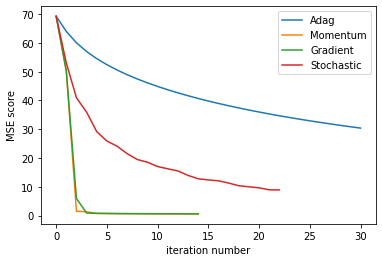

In [175]:
line_adag, = plt.plot(bet_adag, model_best_adag.loss_history, label = 'Adag')
line_mom, = plt.plot(bet_mom,model_best_mom.loss_history, label = 'Momentum' )
line_grad, = plt.plot(bet_grad, model_best.loss_history, label = 'Gradient')
line_stoch,  = plt.plot(bet_stoch, model_best_stoch.loss_history, label = 'Stochastic')
plt.xlabel("iteration number")
plt.ylabel("MSE score")
plt.legend(handles=[line_adag, line_mom,line_grad, line_stoch ])

Как видно из данного графика лучше всего себя показали методы: обычный градиентный и моментум. Они сходятся быстрее остальных методов. Также из следующего метода они имеют лучший R^2 на тестовой выборке.

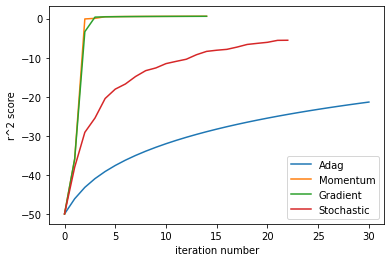

In [176]:
line_adag, = plt.plot(bet_adag, model_best_adag.rquad, label = 'Adag')
line_mom, = plt.plot(bet_mom,model_best_mom.rquad, label = 'Momentum' )
line_grad, = plt.plot(bet_grad, model_best.rquad, label = 'Gradient')
line_stoch,  = plt.plot(bet_stoch, model_best_stoch.rquad, label = 'Stochastic')
plt.xlabel("iteration number")
plt.ylabel("r^2 score")
plt.legend(handles=[line_adag, line_mom,line_grad, line_stoch ])

Как видно из данного графика для лучшей lambdы имеют довольно неплохой R^2 обычный градиентный спуск и Моментум. Остальные же методы для лучшей лямбы имеют непрезентативный R^2.

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

Для данного случая возьму lambda которая показала самые лучшие результаты
lambda=0.03593813663804628. 

In [198]:
for i in range(2):
    start = time.time()
    model1 = LinearRegression(descent = StochasticDescent(lambda_ = 0.03593813663804628, w0 = w0, batch_size = batch_sizes[j] ),
        tolerance = tolerance_default,
        max_iter = max_iter_default, )
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    end = time.time()
    print(end- start)

1.0785059928894043
0.9312970638275146


In [200]:
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

In [202]:
batch_sizes = np.arange(5, 500, 10)
steps = []
steps_time = []
k = 5
for j in range(len(batch_sizes)):
    cur_iter = 0
    cur1_iter = 0
    cur_time = 0
    cur1_time = 0
    for i in range(k):
        start = time.time()
        model1 = LinearRegression(descent = StochasticDescent(lambda_ = 0.03593813663804628, w0 = w0, batch_size = batch_sizes[j] ),
        tolerance = tolerance_default,
        max_iter = max_iter_default, )
    
        model1.fit(X_train, y_train)
        model1.calc_loss(X_val, y_val)
        end = time.time()
        cur_iter += len(model1.loss_history)
        cur1_iter += len(model1.loss_history)**2
        cur_time += end - start
        cur1_time += (end - start)**2
        
    print(j, batch_sizes[j],"мо кол-во итераций ", cur_iter/k, "дисперсия = ", toFixed(cur1_iter/k - (cur_iter/k)**2, 3) ,"средняя время до сход = ",cur_time/k, "дисперсия = ", toFixed(cur1_time/k - (cur_time/k)**2, 3)  ,  "\n")
    #print(j, batch_sizes[j],"значение R^2 = ", len(model1.rquad), "\n")
    steps.append(cur_iter/k)
    steps_time.append(cur_time/k)

0 5 мо кол-во итераций  35.8 дисперсия =  49.760 средняя время до сход =  0.8218589782714844 дисперсия =  0.029 

1 15 мо кол-во итераций  38.0 дисперсия =  10.000 средняя время до сход =  0.8263496875762939 дисперсия =  0.003 

2 25 мо кол-во итераций  37.2 дисперсия =  7.360 средняя время до сход =  0.8032102584838867 дисперсия =  0.004 

3 35 мо кол-во итераций  37.6 дисперсия =  2.640 средняя время до сход =  0.8379086017608642 дисперсия =  0.001 

4 45 мо кол-во итераций  36.4 дисперсия =  2.640 средняя время до сход =  0.8054668426513671 дисперсия =  0.003 

5 55 мо кол-во итераций  36.8 дисперсия =  0.960 средняя время до сход =  0.8395589351654053 дисперсия =  0.004 

6 65 мо кол-во итераций  37.8 дисперсия =  4.560 средняя время до сход =  0.8374045848846435 дисперсия =  0.001 

7 75 мо кол-во итераций  36.8 дисперсия =  1.360 средняя время до сход =  0.869540023803711 дисперсия =  0.008 

8 85 мо кол-во итераций  35.8 дисперсия =  2.960 средняя время до сход =  0.770296859741

Text(0, 0.5, 'Количество итераций до сходимости')

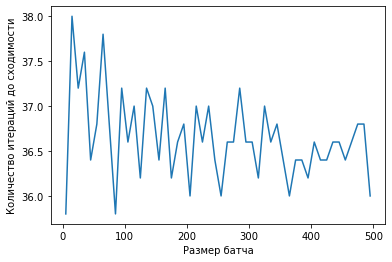

In [203]:
plt.plot(batch_sizes, steps)
plt.xlabel("Размер батча")
plt.ylabel("Среднее время до сходимости, секунды")

Видна убывающая зависимость среднего количества итераций до сходимости от размера батча(k=5)

Text(0, 0.5, 'Количество итераций до сходимости')

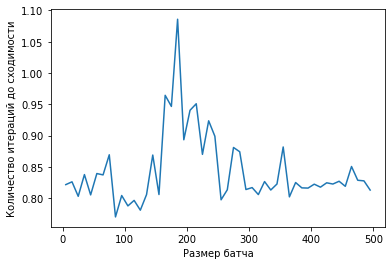

In [204]:
plt.plot(batch_sizes, steps_time)
plt.xlabel("Размер батча")
plt.ylabel("Количество итераций до сходимости")

In [ ]:
Самое долгое время наблюдается для размера батча 160-210. 

Можно сделать вывод, что чем больше размер батча, тем быстрее происходит сходимость(делаю вывод из графика почти линейной зависимости)

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{1}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [205]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

# YOUR CODE:

In [210]:
tolerance_default: float = 1e-3
max_iter_default: int = 50
mus = np.logspace(-4, 1, 10)
for j in range(len(mus)):
    model1 = LinearRegression(descent = GradientDescentReg(lambda_ = 0.03593813663804628, w0 = w0, mu = mus[j]),
    tolerance = tolerance_default,
    max_iter = max_iter_default)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, mus[j],"значение MSE",  model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, mus[j],"значение r^2",  model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

0 0.0001 значение MSE 4.524954159115919 36 

0 0.0001 значение r^2 -2.258360286076994 36 

1 0.00035938136638046257 значение MSE 4.541494930866178 36 

1 0.00035938136638046257 значение r^2 -2.2702710793970837 36 

2 0.001291549665014884 значение MSE 4.60106843945784 36 

2 0.001291549665014884 значение r^2 -2.313169183482023 36 

3 0.004641588833612782 значение MSE 4.666698323014027 37 

3 0.004641588833612782 значение r^2 -2.360428403938109 37 

4 0.016681005372000592 значение MSE 4.161990546176672 51 

4 0.016681005372000592 значение r^2 -1.9969949373673992 51 

5 0.05994842503189409 значение MSE 20.970111752414027 51 

5 0.05994842503189409 значение r^2 -14.100303102741753 51 

6 0.21544346900318845 значение MSE nan 51 

6 0.21544346900318845 значение r^2 nan 51 

7 0.7742636826811278 значение MSE nan 51 

7 0.7742636826811278 значение r^2 nan 51 

8 2.782559402207126 значение MSE nan 51 

8 2.782559402207126 значение r^2 nan 51 

9 10.0 значение MSE nan 51 

9 10.0 значение r^2 na

Адекватное значение для lambda = 0.03593813663804628(взял оптимальное значения для предыдущего номера, ибо потом нужно будет сравнивать графики). Оптимальное mu в данном случае 0.0001, ибо имеет лучшую ошибку и лучший R^2.

In [213]:
model_best_reg = LinearRegression(descent = GradientDescentReg(lambda_ = 0.464158883361278, w0 = w0,mu = 0.0001 ),
    tolerance = tolerance_default,
    max_iter = max_iter_default)



In [214]:
model_best_reg.fit(X_test, y_test)
model_best_reg.calc_loss(X_test, y_test)
print(model_best_reg.loss_history, len(model_best_reg.loss_history), "\n")
print(model_best_reg.rquad, len(model_best_reg.rquad), "\n")

[69.28035695274147, 50.18735789960306, 6.038488199197068, 0.8626394879486694, 0.7645031290846713, 0.7192979575237818, 0.6869727753589898, 0.6625083619402581, 0.6432033750717877, 0.6274657482985934, 0.6142998986614413, 0.6030528136415941, 0.5932789362895585, 0.5846639854377049, 0.5769798863951772, 0.5700570003984524] 16 

[-49.94055840848805, -35.90183118133109, -3.4399881054306825, 0.36571722268560647, 0.4378750628092928, 0.471113585004466, 0.49488169046116626, 0.512869918806127, 0.5270645167326248, 0.538636101105346, 0.548316705564359, 0.5565864780738969, 0.5637730283751372, 0.5701074415675297, 0.5757574167309011, 0.5808476860941496] 16 



In [216]:
bet_grad_reg = np.arange(len(model_best_reg.loss_history))

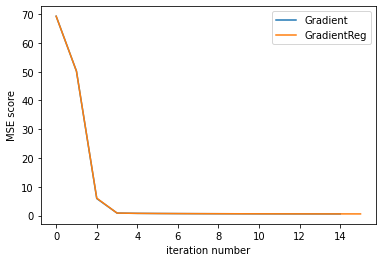

In [217]:
line_grad, = plt.plot(bet_grad, model_best.loss_history, label = 'Gradient')
line_grad_reg, = plt.plot(bet_grad_reg, model_best_reg.loss_history, label = 'GradientReg')
plt.xlabel("iteration number")
plt.ylabel("MSE score")
plt.legend(handles=[line_grad, line_grad_reg])

Как видно из этого графика мю никак не повлияло на ошибку. Посмотрю что будет с этим же графиком, если mu=0.01. До этого я ставил ограничение на max_iter = 50 для быстроты работы(так как можно численно посмотреть очень большое значние MSE для данной итерации). Но теперь же значение MSE на данной итерации маленькое => на больших итерациях будет схожимость.
Поставлю max_iter_default = 300

In [218]:
tolerance_default: float = 1e-3
max_iter_default: int = 300
mus = np.logspace(-4, 1, 10)
for j in range(len(mus)):
    model1 = LinearRegression(descent = GradientDescentReg(lambda_ = 0.03593813663804628, w0 = w0, mu = mus[j]),
    tolerance = tolerance_default,
    max_iter = max_iter_default)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, mus[j],"значение MSE",  model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, mus[j],"значение r^2",  model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

0 0.0001 значение MSE 4.524954159115919 36 

0 0.0001 значение r^2 -2.258360286076994 36 

1 0.00035938136638046257 значение MSE 4.541494930866178 36 

1 0.00035938136638046257 значение r^2 -2.2702710793970837 36 

2 0.001291549665014884 значение MSE 4.60106843945784 36 

2 0.001291549665014884 значение r^2 -2.313169183482023 36 

3 0.004641588833612782 значение MSE 4.666698323014027 37 

3 0.004641588833612782 значение r^2 -2.360428403938109 37 

4 0.016681005372000592 значение MSE 229.36511051567425 301 

4 0.016681005372000592 значение r^2 -164.16281509953484 301 

5 0.05994842503189409 значение MSE nan 301 

5 0.05994842503189409 значение r^2 nan 301 

6 0.21544346900318845 значение MSE nan 301 

6 0.21544346900318845 значение r^2 nan 301 

7 0.7742636826811278 значение MSE nan 301 

7 0.7742636826811278 значение r^2 nan 301 

8 2.782559402207126 значение MSE nan 301 

8 2.782559402207126 значение r^2 nan 301 

9 10.0 значение MSE nan 301 

9 10.0 значение r^2 nan 301 



Построю график для mu = 0.016681005372000592. (По крайней мере такое мю предлагается изначально).
ВИдно что сходимость какая-то есть, так как MSE не доходит до беск, как для остальных случаев для мю больших этого значения.

In [234]:
model_best_reg1 = LinearRegression(descent = GradientDescentReg(lambda_ = 0.464158883361278, w0 = w0,mu = 0.016681005372000592 ),
    tolerance = tolerance_default,
    max_iter = max_iter_default)

model_best_reg1.fit(X_test, y_test)
model_best_reg1.calc_loss(X_test, y_test)
print(model_best_reg1.loss_history, len(model_best_reg1.loss_history), "\n")
print(model_best_reg1.rquad, len(model_best_reg1.rquad), "\n")


[69.28035695274147, 50.18735789960306, 47.175236130634595, 25.873479063352537, 400.4254854331112, 24482.149122742372, 32100202.243744317, 29763966197180.25, 2.0532599771827743e+25, 8.662427905499605e+48, 1.3876256202742787e+96, 3.237016982942047e+190, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] 151 

[-49.94055840848805, -35.90183118133109, -33.68

Но как видно отсюда произошла на тестовой выборке расходимость. Но тем не менее хочется построить более-менее разумный график, чтобы не сильно совпадал, но и различался. Пусть это будет мю = 0.001291549665014884

In [235]:
tolerance_default: float = 1e-3
max_iter_default: int = 150
model_best_reg2 = LinearRegression(descent = GradientDescentReg(lambda_ = 0.464158883361278, w0 = w0,mu = 0.001291549665014884 ),
    tolerance = tolerance_default,
    max_iter = max_iter_default)

model_best_reg2.fit(X_test, y_test)
model_best_reg2.calc_loss(X_test, y_test)
print(model_best_reg2.loss_history, len(model_best_reg2.loss_history), "\n")
print(model_best_reg2.rquad, len(model_best_reg2.rquad), "\n")

[69.28035695274147, 50.18735789960306, 7.568547853528082, 0.8982684372394978, 0.8104098417414548, 0.7675496012503573, 0.7364965703938016, 0.7132045107254094, 0.6950683696729468, 0.6805093531629711, 0.6685345705939517, 0.6584924597509821, 0.6499389517426168, 0.6425613871576297, 0.6361333953396046, 0.6304870810138431, 0.6254952845897997, 0.6210599234811256, 0.6171041248241879, 0.6135667907446248, 0.6103987646529323, 0.6075600756421021, 0.605017923969515, 0.6027451855694543, 0.6007192863323366, 0.5989213439708917, 0.5973355063502657, 0.595948436013619, 0.5947489048709135, 0.5937274728855927, 0.5928762315297658, 0.592188597718578, 0.5916591474965675, 0.5912834813471995, 0.5910581149130858, 0.5909803903424447, 0.5910484045522807, 0.5912609515157681, 0.5916174763082406, 0.5921180391318576, 0.5927632879189401, 0.5935544384141518, 0.5944932608754943, 0.5955820727278432, 0.5968237366614007, 0.5982216637992473, 0.5997798216695368, 0.6015027468137408, 0.6033955619466675, 0.6054639976598734, 0.607

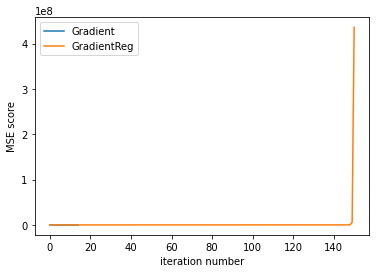

In [236]:
bet_grad_reg2 = np.arange(len(model_best_reg2.loss_history))

line_grad, = plt.plot(bet_grad, model_best.loss_history, label = 'Gradient')
line_grad_reg, = plt.plot(bet_grad_reg2, model_best_reg2.loss_history, label = 'GradientReg')
plt.xlabel("iteration number")
plt.ylabel("MSE score")
plt.legend(handles=[line_grad, line_grad_reg])

Со 140 итерации происходит расходимость для Градиентного метода, мю равное mu = 0.001291549665014884
Итого: для градиентного метода мю = 0.0001 дает такой же график ошибки для MSE.
Наилучший R^2 для данного метода: 0.5652568150609771 против 0.5783308665471971. Несущественное различие.

#  ДЛя Momentum_reg

In [237]:
tolerance_default: float = 1e-3
max_iter_default: int = 150
mus = np.logspace(-4, 1, 10)
for j in range(len(mus)):
    model1 = LinearRegression(descent = MomentumDescentReg(lambda_ = 0.464158883361278, w0 = w0, mu = mus[j]),
    tolerance = tolerance_default,
    max_iter = max_iter_default)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, mus[j],"значение MSE",  model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, mus[j],"значение r^2",  model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

0 0.0001 значение MSE 0.5796609658735077 16 

0 0.0001 значение r^2 0.5825937226819795 16 

1 0.00035938136638046257 значение MSE 0.5411247420670358 28 

1 0.00035938136638046257 значение r^2 0.6103431532421592 28 

2 0.001291549665014884 значение MSE nan 151 

2 0.001291549665014884 значение r^2 nan 151 

3 0.004641588833612782 значение MSE nan 151 

3 0.004641588833612782 значение r^2 nan 151 

4 0.016681005372000592 значение MSE nan 151 

4 0.016681005372000592 значение r^2 nan 151 

5 0.05994842503189409 значение MSE nan 151 

5 0.05994842503189409 значение r^2 nan 151 

6 0.21544346900318845 значение MSE nan 151 

6 0.21544346900318845 значение r^2 nan 151 

7 0.7742636826811278 значение MSE nan 151 

7 0.7742636826811278 значение r^2 nan 151 

8 2.782559402207126 значение MSE nan 151 

8 2.782559402207126 значение r^2 nan 151 

9 10.0 значение MSE nan 151 

9 10.0 значение r^2 nan 151 



In [253]:
tolerance_default: float = 1e-3
max_iter_default: int = 150
model_best_mom_reg = LinearRegression(descent = MomentumDescentReg(lambda_ = 0.464158883361278, w0 = w0,mu = 0.00035938136638046257 ),
    tolerance = tolerance_default,
    max_iter = max_iter_default)

model_best_mom_reg.fit(X_test, y_test)
model_best_mom_reg.calc_loss(X_test, y_test)
print(model_best_mom_reg.loss_history, len(model_best_mom_reg.loss_history), "\n")
print(model_best_mom_reg.rquad, len(model_best_mom_reg.rquad), "\n")

[69.28035695274147, 50.18735789960306, 1.6346837321185543, 1.3348518458006218, 0.7374414133318922, 0.6946937099876865, 0.6646419614783711, 0.6437283922148567, 0.6271314021012161, 0.6133787277911898, 0.601780264368441, 0.5918099772597585, 0.5830909459069846, 0.5753583218757069, 0.56842192834306, 0.5621410226585307, 0.5564085941776701, 0.551141448757104, 0.5462736967155953, 0.5417523158046444, 0.537534039073327, 0.5335831211046287, 0.5298697032939759, 0.5263685969145049, 0.523058363155188, 0.5199206078635095, 0.5169394339277822, 0.514101011051548] 28 

[-49.94055840848805, -35.90183118133109, -0.20195255622301356, 0.018508255318769318, 0.45777303927149104, 0.4892046307761312, 0.511301122733588, 0.5266784813884333, 0.5388819396481204, 0.5489940253788663, 0.5575221598952385, 0.5648531266388954, 0.5712640682885523, 0.576949722973976, 0.5820499241772561, 0.5866681573526311, 0.5908831054374245, 0.5947559395385158, 0.5983351071134988, 0.6016595944359073, 0.6047612148903374, 0.6076662514173419,

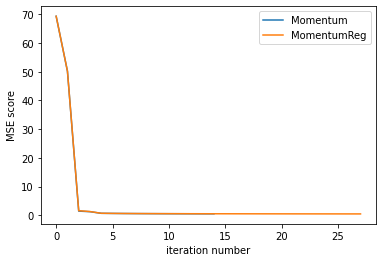

In [254]:
bet_grad_mom_reg = np.arange(len(model_best_mom_reg.loss_history))

line_mom, = plt.plot(bet_mom,model_best_mom.loss_history, label = 'Momentum' )
line_mom_reg, = plt.plot(bet_grad_mom_reg, model_best_mom_reg.loss_history, label = 'MomentumReg')
plt.xlabel("iteration number")
plt.ylabel("MSE score")
plt.legend(handles=[line_mom, line_mom_reg])

Text(0, 0.5, 'difference between MSE score')

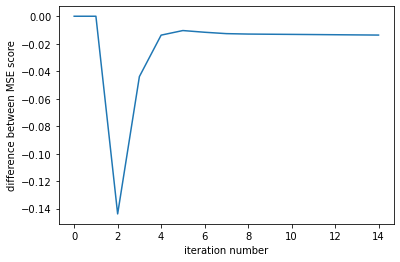

In [255]:
plt.plot(bet_mom,np.array(model_best_mom.loss_history) - np.array(model_best_mom_reg.loss_history[0:15]))
plt.xlabel("iteration number")
plt.ylabel("difference between MSE score")

Аналогичные  графики ошибок. Хочу все-таки найти такую мю, чтобы ошибки где-то отличались.

In [242]:
tolerance_default: float = 1e-3
max_iter_default: int = 150
model_best_mom_reg = LinearRegression(descent = MomentumDescentReg(lambda_ = 0.464158883361278, w0 = w0,mu = 0.0005),
    tolerance = tolerance_default,
    max_iter = max_iter_default)

model_best_mom_reg.fit(X_test, y_test)
model_best_mom_reg.calc_loss(X_test, y_test)
print(model_best_mom_reg.loss_history, len(model_best_mom_reg.loss_history), "\n")
print(model_best_mom_reg.rquad, len(model_best_mom_reg.rquad), "\n")

[69.28035695274147, 50.18735789960306, 1.6964343648861906, 1.3522843720604316, 0.743056195658844, 0.6991298874465577, 0.6696680942682027, 0.649186108423267, 0.632734098648546, 0.6190540298710445, 0.6075258216197666, 0.5976308499114115, 0.5889891920955628, 0.581333949569325, 0.5744742288206239, 0.56826912934295, 0.5626116489749224, 0.5574186412820694, 0.5526242710761194, 0.5481755703225935, 0.5440293244717604, 0.5401498382091152, 0.5365073004971249, 0.5330765675362935, 0.5298362427993839, 0.5267679718415956, 0.5238558947957866, 0.5210862162852247, 0.5184468639161335, 0.5159272144043996, 0.5135178719225632, 0.5112104871851683, 0.5089976086219953, 0.5068725590526746, 0.5048293327979477, 0.5028625092968406, 0.5009671801526016, 0.49913888717880783, 0.49737356951420336, 0.49566751825913724, 0.4940173373858761, 0.4924199099100782, 0.49087236849647226, 0.4893720698196104, 0.4879165721189351, 0.48650361548274673, 0.48513110447293284, 0.48379709276523797, 0.48249976953138846, 0.4812374473317888,

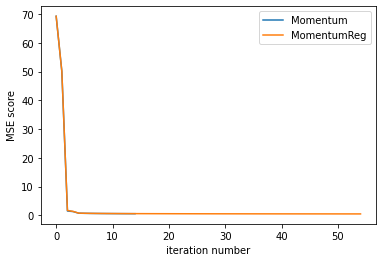

In [243]:
bet_grad_mom_reg = np.arange(len(model_best_mom_reg.loss_history))

line_mom, = plt.plot(bet_mom,model_best_mom.loss_history, label = 'Momentum' )
line_mom_reg, = plt.plot(bet_grad_mom_reg, model_best_mom_reg.loss_history, label = 'MomentumReg')
plt.xlabel("iteration number")
plt.ylabel("MSE score")
plt.legend(handles=[line_mom, line_mom_reg])

Text(0, 0.5, 'difference between MSE score')

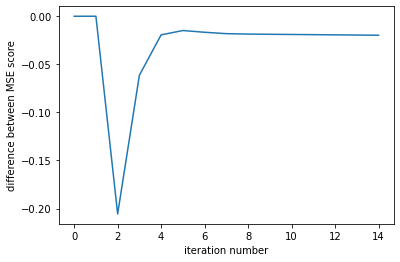

In [252]:
plt.plot(bet_mom,np.array(model_best_mom.loss_history) - np.array(model_best_mom_reg.loss_history[0:15]))
plt.xlabel("iteration number")
plt.ylabel("difference between MSE score")

Это график отличия по  MSE - разница между Momentum и MomentumReg для первых значений
С регуляризацией моментум имеет лучший R^2 0.65044783614827 против 0.5921242733311123

# Для адаград_REg

In [257]:
tolerance_default: float = 1e-3
max_iter_default: int = 150
mus = np.logspace(-4, 1, 10)
for j in range(len(mus)):
    model1 = LinearRegression(descent = AdagradReg(lambda_ = 0.01, w0 = w0, mu = mus[j]),
    tolerance = tolerance_default,
    max_iter = max_iter_default)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, mus[j],"значение MSE",  model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, mus[j],"значение r^2",  model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

0 0.0001 значение MSE 66.11401838331248 8 

0 0.0001 значение r^2 -46.607839610741806 8 

1 0.00035938136638046257 значение MSE 66.11411994158824 8 

1 0.00035938136638046257 значение r^2 -46.6079127415274 8 

2 0.001291549665014884 значение MSE 66.114467181578 8 

2 0.001291549665014884 значение r^2 -46.608162784500784 8 

3 0.004641588833612782 значение MSE 66.11565469361128 8 

3 0.004641588833612782 значение r^2 -46.6090178963787 8 

4 0.016681005372000592 значение MSE 66.11984518190678 8 

4 0.016681005372000592 значение r^2 -46.612035412172496 8 

5 0.05994842503189409 значение MSE 66.13461387176503 8 

5 0.05994842503189409 значение r^2 -46.62267015250782 8 

6 0.21544346900318845 значение MSE 66.0434235468798 9 

6 0.21544346900318845 значение r^2 -46.55700519268014 9 

7 0.7742636826811278 значение MSE 65.94965294417888 11 

7 0.7742636826811278 значение r^2 -46.489482208557384 11 

8 2.782559402207126 значение MSE 66.1174920068671 12 

8 2.782559402207126 значение r^2 -46.610

Как видно для метода Адаград для любых значениях из валидационной сетки параметры сходимости имеют одинаковые значения. (Количество итераций). Лушчее значение имеет мю = 0.0001(лучше показатель MSE)

In [266]:
tolerance_default: float = 1e-3
max_iter_default: int = 150
model_best_ada_reg = LinearRegression(descent = AdagradReg(lambda_ = 0.01, w0 = w0,mu = 0.0001),
    tolerance = tolerance_default,
    max_iter = max_iter_default)

model_best_ada_reg.fit(X_test, y_test)
model_best_ada_reg.calc_loss(X_test, y_test)
print(model_best_ada_reg.loss_history, len(model_best_ada_reg.loss_history), "\n")
print(model_best_ada_reg.rquad, len(model_best_ada_reg.rquad), "\n")

[69.28035695274147, 68.09439732526505, 67.50821219225458, 67.11952454853011, 66.82902121719596, 66.59721225202162, 66.40442786372726, 66.23945942646618] 8 

[-49.94055840848805, -49.068544343739774, -48.63753331377819, -48.351738515819655, -48.13813681732116, -47.96769199501561, -47.82594121854586, -47.70464299371732] 8 



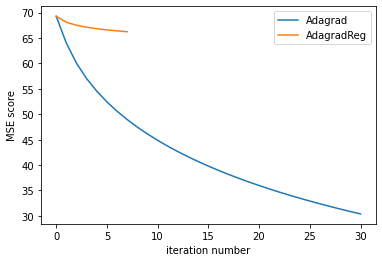

In [267]:
bet_grad_ada_reg = np.arange(len(model_best_ada_reg.loss_history))

line_ada, = plt.plot(bet_adag,model_best_adag.loss_history, label = 'Adagrad' )
line_ada_reg, = plt.plot(bet_grad_ada_reg, model_best_ada_reg.loss_history, label = 'AdagradReg')
plt.xlabel("iteration number")
plt.ylabel("MSE score")
plt.legend(handles=[line_ada, line_ada_reg])

Как видно из данного графика регуляризованный адаград сходится быстрее, но имеет большую ошибку 
R^2 у регуляризованного -47.7046429937173, что в разы хуже 0.7636303400208019

# ДЛя Stochastic_reg

In [265]:
tolerance_default: float = 1e-3
max_iter_default: int = 150
mus = np.logspace(-4, 1, 10)
for j in range(len(mus)):
    model1 = LinearRegression(descent = StochasticDescentReg(lambda_ = 0.03593813663804628, w0 = w0, mu = mus[j], batch_size = 2),
    tolerance = tolerance_default,
    max_iter = max_iter_default)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, mus[j],"значение MSE",  model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, mus[j],"значение r^2",  model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

0 0.0001 значение MSE 3.85875820898823 42 

0 0.0001 значение r^2 -1.778641298809839 42 

1 0.00035938136638046257 значение MSE 5.815908225172241 34 

1 0.00035938136638046257 значение r^2 -3.1879594183717135 34 

2 0.001291549665014884 значение MSE 8.572288819816068 27 

2 0.001291549665014884 значение r^2 -5.172793020455206 27 

3 0.004641588833612782 значение MSE 6.640829218652217 36 

3 0.004641588833612782 значение r^2 -3.781974232619354 36 

4 0.016681005372000592 значение MSE 4.03108321734678 151 

4 0.016681005372000592 значение r^2 -1.9027302826511887 151 

5 0.05994842503189409 значение MSE nan 151 

5 0.05994842503189409 значение r^2 nan 151 

6 0.21544346900318845 значение MSE nan 151 

6 0.21544346900318845 значение r^2 nan 151 

7 0.7742636826811278 значение MSE nan 151 

7 0.7742636826811278 значение r^2 nan 151 

8 2.782559402207126 значение MSE nan 151 

8 2.782559402207126 значение r^2 nan 151 

9 10.0 значение MSE nan 151 

9 10.0 значение r^2 nan 151 



Быстрее всего сходится для мю = 0.001291549665014884. Посмотрю качество на тестовой

In [270]:
tolerance_default: float = 1e-3
max_iter_default: int = 150
model_best_stoch_reg = LinearRegression(descent = StochasticDescentReg(lambda_ = 0.03593813663804628, w0 = w0,mu = 0.001291549665014884, batch_size = 2),
    tolerance = tolerance_default,
    max_iter = max_iter_default)

model_best_stoch_reg.fit(X_test, y_test)
model_best_stoch_reg.calc_loss(X_test, y_test)
print(model_best_stoch_reg.loss_history, len(model_best_stoch_reg.loss_history), "\n")
print(model_best_stoch_reg.rquad, len(model_best_stoch_reg.rquad), "\n")

[69.28035695274147, 51.01772286223378, 43.18498158907865, 35.399217773953815, 31.20381496363781, 27.720014893338845, 25.068493447217357, 22.666933862954355, 20.925663776295682, 19.395981996688636, 18.240776108819748, 16.95002496310904, 15.814892389386527, 13.959365928152518, 12.916974797962382, 11.98355444877766, 11.213745288481984, 10.300399732562434, 9.558704227006064, 9.1737245491259, 8.795010255513906, 8.582079849981394, 8.205899155704495, 7.919090431862387, 7.468182896683208, 7.142251204083487, 6.812568102677961, 6.509878401298203, 6.224879956278672, 6.0871914761182975, 5.921697121587489, 5.540233015398639, 5.2422932401115565, 5.103862887734068, 4.9341923606155635, 4.703326903391591, 4.551462574796971, 4.54257354365504] 38 

[-49.94055840848805, -36.51238310022646, -30.753114068227845, -25.02838668771504, -21.94358500212586, -19.382011581168815, -17.43239715886371, -15.666575046297751, -14.386251525232533, -13.261504952497255, -12.412103540709555, -11.463038220885197, -10.62839634

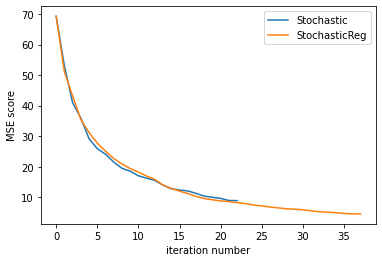

In [271]:
bet_grad_stoch_reg = np.arange(len(model_best_stoch_reg.loss_history))

line_stoch,  = plt.plot(bet_stoch, model_best_stoch.loss_history, label = 'Stochastic')
line_stoch_reg, = plt.plot(bet_grad_stoch_reg, model_best_stoch_reg.loss_history, label = 'StochasticReg')
plt.xlabel("iteration number")
plt.ylabel("MSE score")
plt.legend(handles=[line_stoch, line_stoch_reg])

В данном случае видны флуктации в обе стороны. Но в целом ошибки имеют те же значения.
R^2 в данном случае в 2 раза лучше: -2.3400698712227896 против -5.544357880166256.

С регуляризацией лучше себя показали методы: Стохастический, Моментум. Они имеют идентичные ошибки по MSE, но лучший R^2
Градиентный метод имеет практически идентичные результаты.
Адаград с регуляризацией хуже по обеим метрикам.

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [35]:
%autoreload 3

from utils import (
    StochasticAverageGradient,
)

In [62]:
model_best_sag = LinearRegression(descent = StochasticAverageGradient(lambda_ = 0.464158883361278, w0 = w0, x_shape = X_train.shape[0]),
    tolerance = tolerance_default,
    max_iter = max_iter_default)



In [63]:
model_best_sag.fit(X_test, y_test)
model_best_sag.calc_loss(X_test, y_test)
print(model_best_sag.loss_history, len(model_best_sag.loss_history), "\n")
print(model_best_sag.rquad, len(model_best_sag.rquad), "\n")

[69.28035695274147, 68.72578366634741, 67.86431985195827, 66.78032342843679, 65.55864126205076, 64.24398941991691, 62.880524945673834, 61.40743872369573, 59.82911970600638, 58.20495518637933, 56.55139535592788, 54.85705583435139, 53.16008792947818, 51.421263960761536, 49.654072585129605, 47.83578426637674, 45.99731153565989, 44.16037089851995, 42.34523407915404, 40.57009605898432, 38.812763606902294, 37.06446948537034, 35.335717946552485, 33.626257226710415, 31.90105244451387, 30.230263784937545, 28.605054508649747, 27.011509378499593, 25.459362954868194, 23.964966573120083, 22.526015675415866, 21.143418594788397, 19.807039912759535, 18.496646624174044, 17.216784374260058, 15.989284750905059, 14.82512668404738, 13.716552729435435, 12.662298938746233, 11.657088725596898, 10.700821876139546, 9.808728116111658, 8.975843790104197, 8.203478495190314, 7.473190600619545, 6.805951573707469, 6.2022806649364615, 5.650691502235712, 5.160375860073529, 4.725422737504412, 4.348028951303261] 51 

[-4

In [81]:
tolerance_default = 0.0000001 # ставлю такое tplerance, потому что из-за небольших приращений алгоритм сразу выбивается при аналогичным предыдущим методам tolerance
max_iter_default: int = 150
alphas = np.logspace(-2, 3, 10)
for j in range(len(alphas)):
    model1 = LinearRegression(descent = StochasticAverageGradient(lambda_ = alphas[j], w0 = w0, x_shape = X_train.shape[0]),
    tolerance = tolerance_default,
    max_iter = max_iter_default)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, alphas[j],"значение MSE",  model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, alphas[j],"значение r^2",  model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

0 0.01 значение MSE 54.63272282758066 151 

0 0.01 значение r^2 -38.340308900813454 151 

1 0.03593813663804628 значение MSE 26.449502807000698 151 

1 0.03593813663804628 значение r^2 -18.045940909520997 151 

2 0.1291549665014884 значение MSE 3.501049149087634 151 

2 0.1291549665014884 значение r^2 -1.5210596849934985 151 

3 0.464158883361278 значение MSE 45.0234910952845 151 

3 0.464158883361278 значение r^2 -31.420826856305403 151 

4 1.6681005372000592 значение MSE 36.50416321403822 151 

4 1.6681005372000592 значение r^2 -25.286170314780378 151 

5 5.994842503189409 значение MSE 230.79009432395233 151 

5 5.994842503189409 значение r^2 -165.188927295576 151 

6 21.544346900318846 значение MSE 19917025.352225244 151 

6 21.544346900318846 значение r^2 -14341988.364409136 151 

7 77.42636826811278 значение MSE 119027828601015.97 151 

7 77.42636826811278 значение r^2 -85710382031207.19 151 

8 278.2559402207126 значение MSE 1.3797646267548152e+34 151 

8 278.2559402207126 значен

Возьму лямбда оптимальную, которая была в стохастическом градиентном спуске.  Lambda = 0.03593813663804628

In [79]:
tolerance_default = 0.00001
model_best_SAG = LinearRegression(descent = StochasticAverageGradient(lambda_ = 0.03593813663804628, w0 = w0, x_shape = X_train.shape[0]),
    tolerance = tolerance_default,
    max_iter = max_iter_default)



In [82]:
model_best_SAG.fit(X_test, y_test)
model_best_SAG.calc_loss(X_test, y_test)
print(model_best_SAG.loss_history, len(model_best_SAG.loss_history), "\n")
print(model_best_SAG.rquad, len(model_best_SAG.rquad), "\n")

[69.28035695274147, 69.23446706679945, 69.17482824606088, 69.10283185058898, 69.01545837129864, 68.92102003628548, 68.81647674166221, 68.70255232986038, 68.57992967023331, 68.45104189641165, 68.31396261154767, 68.17035955348769, 68.01787888882306, 67.8579932347857, 67.69208291335221, 67.5215066332807, 67.34908599330572, 67.17041484872186, 66.98376008558883, 66.79084588147988, 66.592647705136, 66.3889451548754, 66.17753881661241, 65.9639262100582, 65.74728301207378, 65.52670637303473, 65.3049188235808, 65.08782106079892, 64.86816435488463, 64.64517373290079, 64.42103308365436, 64.1917394978342, 63.95808918168076, 63.72068640049438, 63.4785838897825, 63.23269782890377, 62.98414948188072, 62.731787610486286, 62.47829321420498, 62.223449029189865, 61.9666945314507, 61.70427834124923, 61.4394592143946, 61.17370993715349, 60.906721454781575, 60.63701291900122, 60.36625705835846, 60.093310183217945, 59.81728810717645, 59.53968494712285, 59.25939018350721, 58.972113842904676, 58.68369145566940

In [83]:
bet_stoch_SAG = np.arange(len(model_best_SAG.loss_history))

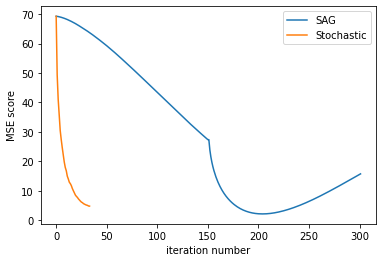

In [91]:
line_stoch_SAG,  = plt.plot(bet_stoch_SAG, model_best_SAG.loss_history, label = 'SAG')
line_stoch,  = plt.plot(bet_stoch, model_best_stoch.loss_history, label = 'Stochastic')
plt.xlabel("iteration number")
plt.ylabel("MSE score")
plt.legend(handles=[line_stoch_SAG, line_stoch ])

In [87]:
tolerance_default = 0.001
alphas = np.logspace(-2, 3, 10)
for j in range(len(alphas)):
    model1 = LinearRegression(descent = StochasticDescent(lambda_ = alphas[j], w0 = w0, batch_size = 2 ),
    tolerance = tolerance_default,
    max_iter = max_iter_default, 
)
    
    model1.fit(X_train, y_train)
    model1.calc_loss(X_val, y_val)
    print(j, alphas[j],"значение MSE = ", model1.loss_history[len(model1.loss_history)-1], len(model1.loss_history), "\n")
    print(j, alphas[j],"значение R^2 = ", model1.rquad[len(model1.rquad)-1], len(model1.rquad), "\n")

35 0.000821359162354725 произошла сходимость
0 0.01 значение MSE =  30.585213323499463 37 

0 0.01 значение R^2 =  -21.02401194136177 37 

39 0.0006924201334380766 произошла сходимость
1 0.03593813663804628 значение MSE =  3.4594422847968986 41 

1 0.03593813663804628 значение R^2 =  -1.4910991263964557 41 

29 0.0003855976474109835 произошла сходимость
2 0.1291549665014884 значение MSE =  1.5162297839142649 31 

2 0.1291549665014884 значение R^2 =  -0.09181722924649449 31 

100 0.0002728775752120065 произошла сходимость
3 0.464158883361278 значение MSE =  10.000145248436992 102 

3 0.464158883361278 значение R^2 =  -6.20097375282027 102 

4 1.6681005372000592 значение MSE =  1.3000413740340062e+19 151 

4 1.6681005372000592 значение R^2 =  -9.36142783872312e+18 151 

5 5.994842503189409 значение MSE =  2.3752889266274223e+120 151 

5 5.994842503189409 значение R^2 =  -1.710414478097915e+120 151 

6 21.544346900318846 значение MSE =  4.423835990077171e+301 151 

6 21.544346900318846 зн

/Users/admin/ml-course-hse/2020-fall/homeworks-practice/homework-practice-03-gd/utils.py:104: RuntimeWarning: overflow encountered in multiply
  k = self.eta(iteration)*gradient


8 278.2559402207126 значение MSE =  nan 151 

8 278.2559402207126 значение R^2 =  nan 151 

9 1000.0 значение MSE =  nan 151 

9 1000.0 значение R^2 =  nan 151 



Восстановлю значения для Стохастического, ибо в предыдущей части кернел умер(я перезагружать не хочу).

In [88]:
model_best_stoch = LinearRegression(descent = StochasticDescent(lambda_ = 0.03593813663804628, w0 = w0, batch_size = 2),
    tolerance = tolerance_default,
    max_iter = max_iter_default
)

In [89]:
model_best_stoch.fit(X_test, y_test)
model_best_stoch.calc_loss(X_test, y_test)
print(model_best_stoch.loss_history, len(model_best_stoch.loss_history))
print(model_best_stoch.rquad, len(model_best_stoch.rquad), "\n")

32 0.0008022074486899476 произошла сходимость
[69.28035695274147, 49.363893150763545, 41.025902906409456, 35.78458537051074, 30.4665269251144, 27.39942240934627, 24.69751928525534, 22.216033231108696, 19.77134762842654, 17.926764875182588, 16.804958770322692, 14.971445809974224, 14.010703838425984, 12.909927800097242, 12.428731407372068, 11.747486729925457, 10.775339800610782, 10.010899005500237, 9.282950719236878, 8.547637702811937, 8.101976204806514, 7.745710554271107, 7.249245569810133, 6.864672026518451, 6.4789495212589125, 6.1363187652767675, 5.957427714597211, 5.629617413717251, 5.4647024369573005, 5.272826439257674, 5.140850512147501, 5.036176359545222, 4.829640104113803, 4.787186820314362] 34
[-49.94055840848805, -35.29635286134778, -29.165583654404255, -25.311740316717525, -21.401470815042487, -19.146285888137438, -17.159626754716445, -15.335036194836203, -13.53750432272462, -12.181216918706056, -11.35637374639684, -10.00822575528498, -9.301810045699026, -8.49242989031964, -8.

In [90]:
bet_stoch = np.arange(len(model_best_stoch.loss_history))

Сравню для другого lambda = 0.1291549665014884

In [92]:
tolerance_default = 0.00001
model_best_SAG = LinearRegression(descent = StochasticAverageGradient(lambda_ = 0.1291549665014884, w0 = w0, x_shape = X_train.shape[0]),
    tolerance = tolerance_default,
    max_iter = max_iter_default)

model_best_SAG.fit(X_test, y_test)
model_best_SAG.calc_loss(X_test, y_test)
print(model_best_SAG.loss_history, len(model_best_SAG.loss_history), "\n")
print(model_best_SAG.rquad, len(model_best_SAG.rquad), "\n")


[69.28035695274147, 69.17464998611841, 68.94534244690698, 68.66601340088708, 68.36945357235905, 68.04015891795665, 67.66845120988197, 67.26682421136078, 66.8364313308494, 66.36765935254289, 65.89049761540467, 65.39010418272314, 64.86126584075544, 64.32527180091809, 63.771427778627945, 63.188240446201625, 62.57553633916026, 61.93033165319206, 61.27343185512286, 60.60567084276543, 59.93113991223184, 59.23470149933621, 58.529676260289634, 57.81052377537188, 57.0834884548092, 56.347541159804, 55.611114744328646, 54.87856205801943, 54.13794308384673, 53.3944504975455, 52.63100323316817, 51.8604640176925, 51.087077899490055, 50.31451350063845, 49.54014310534061, 48.76460397048965, 47.988498091968836, 47.21525890458306, 46.44413799013129, 45.67663906192378, 44.90772106750633, 44.14206197709132, 43.37261940286578, 42.60432511919047, 41.83298998443069, 41.06721671573878, 40.30336718549141, 39.544328018151774, 38.79301911499208, 38.040124554935815, 37.28959123660103, 36.543536965983364, 35.79890

In [93]:
bet_stoch_SAG = np.arange(len(model_best_SAG.loss_history))

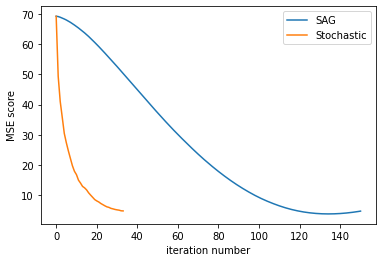

In [94]:
line_stoch_SAG,  = plt.plot(bet_stoch_SAG, model_best_SAG.loss_history, label = 'SAG')
line_stoch,  = plt.plot(bet_stoch, model_best_stoch.loss_history, label = 'Stochastic')
plt.xlabel("iteration number")
plt.ylabel("MSE score")
plt.legend(handles=[line_stoch_SAG, line_stoch ])

R^2 чуть лучше для  SAG наилучшее (-1.788322438312163) против Stochastic(-2.519929465705765)
MSE же наилучшее для SAG 3.7952729911413035 против Stochastic(4.787186820314362)
Как видно SAG сходится дольше чем Stochastic, но имеет показатели лучше.

Вставьте картинку или видео, описывающие ваш опыт выполнения этого задания.

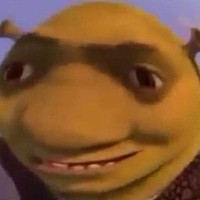

In [101]:
from IPython.display import Image
Image(filename='photo.jpg',width=800, height=400)